<a href="https://colab.research.google.com/github/Gmajorseven/training-data-sci/blob/main/lab4_curve_fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Curve Fitting:

1. **Overfitting** คือการที่แบบจำลอง (Model) ให้ผลลัพธ์ "**ดี**" กับข้อมูลฝึกสอน(Train) แต่ให้ผลการทำนาย(Prediction) ที่"**ไม่ดี**" กับข้อมูลทดสอบ(Test)
2. **Underfitting** คือการที่แบบจำลอง (Model) ให้ผลลัพธ์ที่ "**ไม่ดี**" ทั้งข้อมูลการฝึกสอน (Train) และข้อมูลทดสอบ(Test)



In [ ]:
# Step 1: ทำความเข้าใจข้อมูล (Data Understanding)
import pandas as pd

data = pd.DataFrame([[1, 3],
                     [5, 5],
                     [5, 10],
                     [10, 12],
                     [14, 16],
                     [17, 15],
                     [21, 7],
                     [24, 4],
                     [25, 1]])
data

,0,1
0,1,3
1,5,5
2,5,10
3,10,12
4,14,16
5,17,15
6,21,7
7,24,4
8,25,1


In [ ]:
# Step 2: เปลี่ยนชื่อคอลัมน์ของ data

data.columns = ['x', 'y']

data

,x,y
0,1,3
1,5,5
2,5,10
3,10,12
4,14,16
5,17,15
6,21,7
7,24,4
8,25,1


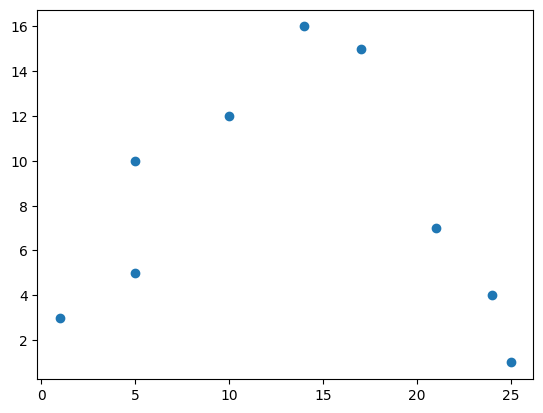

In [ ]:
# Step 3: เปลี่ยนข้อมูลให้เห็นเป็นภาพ (Data Visualization)

%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(x=data['x'], y=data['y'])

In [ ]:
# Step 4: นำเข้า Library ที่จำเป็นในการจัดเตรียมข้อมูล และการสร้างแบบจำลอง (Model)

import numpy as np
from sklearn.linear_model import LinearRegression     # Model เชิงเส้น
from sklearn.preprocessing import PolynomialFeatures  # แปลงข้อมูลเข้า (Input/Feature) ให้อยู่ในรูป Polynomial
from sklearn.pipeline import make_pipeline

In [ ]:
x = np.array(data['x']) # จัดเก็บข้อมูล x ในรูปของ numpy.array
y = np.array(data['y']) # จัดเก็บข้อมูล x ในรูปของ numpy.array

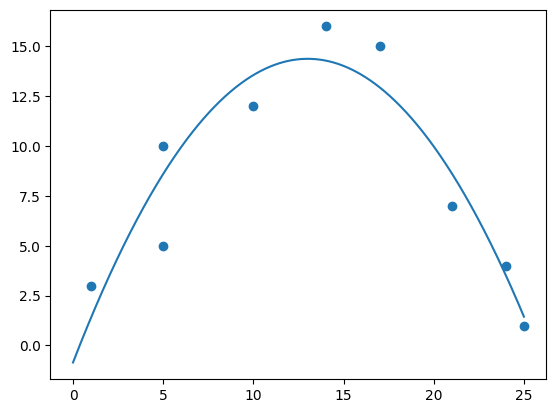

In [ ]:
# Step 5: สร้างแบบจำลอง

model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())  # ลองเพิ่ม degree ดูนะครับ

model.fit(x[:, np.newaxis], y)  # np.newaxis จะทำการเปลี่ยนข้อมูลจาก 1 มิติ เป็น 2 มิติ

xfit = np.linspace(0, 25, 1000)           # ข้อมูลสำหร้บการวาดเส้นในแกน x (input)
yfit = model.predict(xfit[:, np.newaxis]) # ข้อมูลสำหรับการวาดเส้นในแกน y (output)

plt.scatter(x, y)     # แสดงจุดของ x และ y
plt.plot(xfit, yfit)  # วาดเส้น

In [ ]:
# Step 6: ค่า R2 ใช้เพื่อวัดประสิทธิภาพของแบบจำลอง เข้าใกล้ 1 แปลว่า การทำนายจะ Fit กับข้อมูลมาก
r2 = model.score(x[:, np.newaxis], y)

print(f'coefficient of determination: {r2}')

coefficient of determination: 0.8703404241526076
